<a href="https://colab.research.google.com/github/kridtapon/Spike-Swing-Strategy/blob/main/Spike_%26_Swing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Klinger Oscillator
def calculate_klinger(df, short_period=34, long_period=55):
    """
    Calculate Klinger Oscillator (KO).
    """
    # Calculate money flow multiplier
    money_flow_multiplier = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])

    # Calculate money flow volume
    money_flow_volume = money_flow_multiplier * df['Volume']

    # Calculate short-term and long-term EMAs
    short_ema = money_flow_volume.ewm(span=short_period).mean()
    long_ema = money_flow_volume.ewm(span=long_period).mean()

    # Klinger Oscillator
    klinger_oscillator = short_ema - long_ema

    # Signal line (Exponential Moving Average of KO)
    klinger_signal = klinger_oscillator.ewm(span=9).mean()

    return klinger_oscillator, klinger_signal

# Function to identify volume spike
def detect_volume_spike(df, period=20, multiplier=1.5):
    """
    Detects volume spikes where the volume is greater than the average volume by a specified multiplier.
    """
    avg_volume = df['Volume'].rolling(window=period).mean()
    volume_spike = df['Volume'] > (avg_volume * multiplier)
    return volume_spike

# Define the stock symbol and time period
symbol = 'TPL'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Klinger Oscillator and Signal Line
df['Klinger'], df['Klinger_Signal'] = calculate_klinger(df, short_period=34, long_period=55)

# Detect volume spike
df['Volume_Spike'] = detect_volume_spike(df, period=20, multiplier=1.5)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on Volume Spike and Klinger Oscillator
df['Entry'] = (df['Volume_Spike']) & (df['Klinger'] > df['Klinger_Signal'])
df['Exit'] = (df['Volume_Spike']) & (df['Klinger'] < df['Klinger_Signal'])

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

[*********************100%***********************]  1 of 1 completed


Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  528611.896365
Total Return [%]                              428.611896
Benchmark Return [%]                           370.65604
Max Gross Exposure [%]                             100.0
Total Fees Paid                             12519.982473
Max Drawdown [%]                               33.910167
Max Drawdown Duration                  468 days 00:00:00
Total Trades                                          27
Total Closed Trades                                   27
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   51.851852
Best Trade [%]                                  78.82465
Worst Trade [%]                

In [ ]:
# Define Entry and Exit signals based on Volume Spike and Klinger Oscillator
df['Entry'] = (df['Volume_Spike']) & (df['Klinger'] > df['Klinger_Signal']) & (df['Klinger'] > 0) & (df['Klinger_Signal'] > 0)
df['Exit'] = (df['Volume_Spike']) & (df['Klinger'] < df['Klinger_Signal']) & (df['Klinger'] < 0) & (df['Klinger_Signal'] < 0)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  575513.600789
Total Return [%]                              475.513601
Benchmark Return [%]                           370.65604
Max Gross Exposure [%]                             100.0
Total Fees Paid                              5526.053706
Max Drawdown [%]                               36.564894
Max Drawdown Duration                  186 days 00:00:00
Total Trades                                          11
Total Closed Trades                                   10
Total Open Trades                                      1
Open Trade PnL                             138249.784144
Win Rate [%]                                        70.0
Best Trade [%]                                152.342644
Worst Trade [%]                

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Klinger Oscillator
def calculate_klinger(df, short_period=34, long_period=55):
    """
    Calculate Klinger Oscillator (KO).
    """
    # Calculate money flow multiplier
    money_flow_multiplier = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])

    # Calculate money flow volume
    money_flow_volume = money_flow_multiplier * df['Volume']

    # Calculate short-term and long-term EMAs
    short_ema = money_flow_volume.ewm(span=short_period).mean()
    long_ema = money_flow_volume.ewm(span=long_period).mean()

    # Klinger Oscillator
    klinger_oscillator = short_ema - long_ema

    # Signal line (Exponential Moving Average of KO)
    klinger_signal = klinger_oscillator.ewm(span=9).mean()

    return klinger_oscillator, klinger_signal

# Function to identify volume spike
def detect_volume_spike(df, period=20, multiplier=1.5):
    """
    Detects volume spikes where the volume is greater than the average volume by a specified multiplier.
    """
    avg_volume = df['Volume'].rolling(window=period).mean()
    volume_spike = df['Volume'] > (avg_volume * multiplier)
    return volume_spike

# Define the stock symbol and time period
symbol = 'TPL'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Klinger Oscillator and Signal Line
df['Klinger'], df['Klinger_Signal'] = calculate_klinger(df, short_period=34, long_period=55)

# Detect volume spike
df['Volume_Spike'] = detect_volume_spike(df, period=20, multiplier=1.5)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on Volume Spike and Klinger Oscillator
df['Entry'] = (df['Volume_Spike']) & (df['Klinger'] > df['Klinger_Signal']) & (df['Klinger'] > 0) & (df['Klinger_Signal'] > 0)
df['Exit'] = (df['Volume_Spike']) & (df['Klinger'] < df['Klinger_Signal']) & (df['Klinger'] < 0) & (df['Klinger_Signal'] < 0)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                                2020-01-02 00:00:00
End                                  2024-12-31 00:00:00
Period                                1258 days 00:00:00
Start Value                                     100000.0
End Value                                  575513.600789
Total Return [%]                              475.513601
Benchmark Return [%]                           370.65604
Max Gross Exposure [%]                             100.0
Total Fees Paid                              5526.053706
Max Drawdown [%]                               36.564894
Max Drawdown Duration                  186 days 00:00:00
Total Trades                                          11
Total Closed Trades                                   10
Total Open Trades                                      1
Open Trade PnL                             138249.784144
Win Rate [%]                                        70.0
Best Trade [%]                                152.342644
Worst Trade [%]                

[*********************100%***********************]  1 of 1 completed


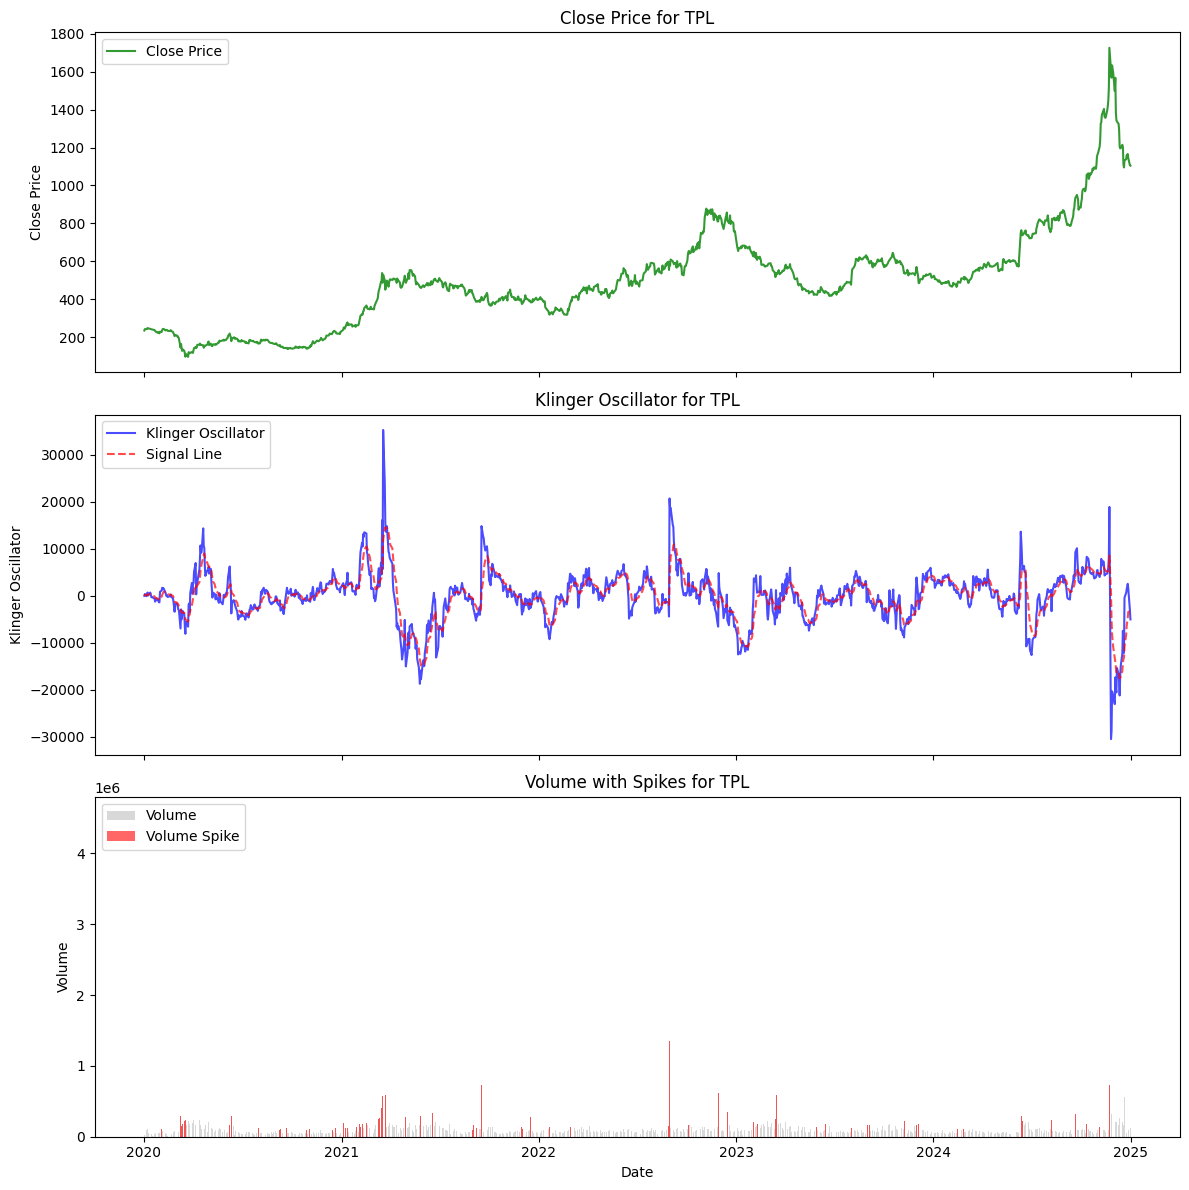

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate Klinger Oscillator
def calculate_klinger(df, short_period=34, long_period=55):
    """
    Calculate Klinger Oscillator (KO).
    """
    # Calculate money flow multiplier
    money_flow_multiplier = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])

    # Calculate money flow volume
    money_flow_volume = money_flow_multiplier * df['Volume']

    # Calculate short-term and long-term EMAs
    short_ema = money_flow_volume.ewm(span=short_period).mean()
    long_ema = money_flow_volume.ewm(span=long_period).mean()

    # Klinger Oscillator
    klinger_oscillator = short_ema - long_ema

    # Signal line (Exponential Moving Average of KO)
    klinger_signal = klinger_oscillator.ewm(span=9).mean()

    return klinger_oscillator, klinger_signal

# Function to identify volume spike
def detect_volume_spike(df, period=20, multiplier=1.5):
    """
    Detects volume spikes where the volume is greater than the average volume by a specified multiplier.
    """
    avg_volume = df['Volume'].rolling(window=period).mean()
    volume_spike = df['Volume'] > (avg_volume * multiplier)
    return volume_spike

# Define the stock symbol and time period
symbol = 'TPL'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate the Klinger Oscillator and Signal Line
klinger_oscillator, klinger_signal = calculate_klinger(df)

# Detect volume spikes
volume_spike = detect_volume_spike(df)

# Plotting the data with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# First Panel: Plot Close Price
axs[0].plot(df.index, df['Close'], label='Close Price', color='g', alpha=0.8)
axs[0].set_ylabel('Close Price')
axs[0].set_title(f'Close Price for {symbol}')
axs[0].legend(loc='upper left')

# Second Panel: Plot Klinger Oscillator and Signal Line
axs[1].plot(df.index, klinger_oscillator, label='Klinger Oscillator', color='b', alpha=0.7)
axs[1].plot(df.index, klinger_signal, label='Signal Line', color='r', linestyle='--', alpha=0.7)
axs[1].set_ylabel('Klinger Oscillator')
axs[1].set_title(f'Klinger Oscillator for {symbol}')
axs[1].legend(loc='upper left')

# Third Panel: Plot Volume with Volume Spikes
axs[2].bar(df.index, df['Volume'], label='Volume', color='gray', alpha=0.3)
axs[2].bar(df.index[volume_spike], df['Volume'][volume_spike], color='r', label='Volume Spike', alpha=0.6)
axs[2].set_ylabel('Volume')
axs[2].set_title(f'Volume with Spikes for {symbol}')
axs[2].legend(loc='upper left')

# Adding the x-axis label
plt.xlabel('Date')

# Show the plot
plt.tight_layout()
plt.show()
